In [2]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)

2023-01-06 20:42:23,615 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-06 20:42:23,623 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


In [3]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [4]:
t = time.time()
classifier = LogisticRegression(max_iter = 1000, random_state=42)
classifier.fit(X_train, y_train)
save_pickle_object(classifier, gl.pkl_classifier_LR)
training_time = time.time() - t
print(f"train time: {training_time}" )


2023-01-06 20:42:24,222 | INFO : Saving pickle file from: pickle\pkl_classifier_LR.pkl
train time: 0.4757392406463623


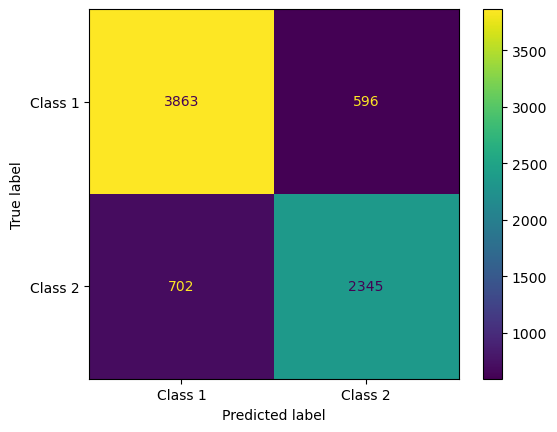

              precision    recall  f1-score   support

     Class 1       0.85      0.87      0.86      4459
     Class 2       0.80      0.77      0.78      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.64.


In [5]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

This time use class_weight='balanced'

In [6]:
t = time.time()
classifier = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state=42)
classifier.fit(X_train, y_train)
save_pickle_object(classifier, gl.pkl_classifier_balanced_LR)
training_time = time.time() - t
print(f"train time: {training_time}" )

2023-01-06 20:42:24,930 | INFO : Saving pickle file from: pickle\pkl_classifier_balanced_LR.pkl
train time: 0.38466835021972656


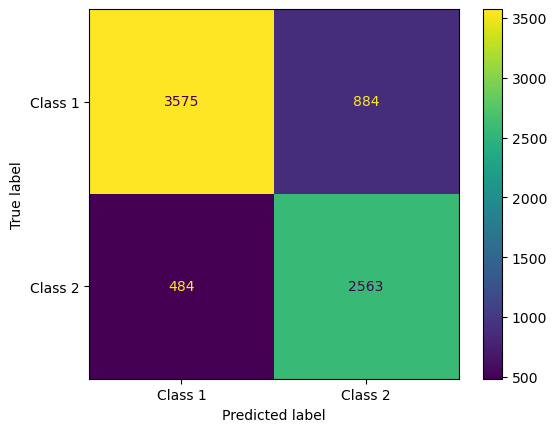

              precision    recall  f1-score   support

     Class 1       0.88      0.80      0.84      4459
     Class 2       0.74      0.84      0.79      3047

    accuracy                           0.82      7506
   macro avg       0.81      0.82      0.81      7506
weighted avg       0.83      0.82      0.82      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.63.


In [7]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

It is interesting to note that there are siginificant variations in the results but the overall impact on the F1 scores and the Matthews Corellation Coefficient are very similar. Given the dataset is well balanced then this may be the reason that there has not been any improvement in using the class_weight parameter.

Now try for the bigram, trigram, stemming and lemmatization tf/idx matrices

2023-01-06 20:42:25,209 | INFO : Calculating for Bigram...
2023-01-06 20:42:25,210 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
train time: 1.4062399864196777
2023-01-06 20:42:26,648 | INFO : Results for Bigram.


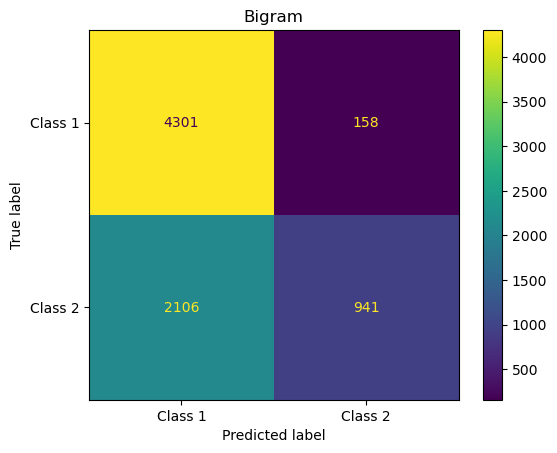

              precision    recall  f1-score   support

     Class 1       0.67      0.96      0.79      4459
     Class 2       0.86      0.31      0.45      3047

    accuracy                           0.70      7506
   macro avg       0.76      0.64      0.62      7506
weighted avg       0.75      0.70      0.65      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.38.
2023-01-06 20:42:26,858 | INFO : Calculating for Trigram...
2023-01-06 20:42:26,859 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
train time: 1.3075027465820312
2023-01-06 20:42:28,193 | INFO : Results for Trigram.


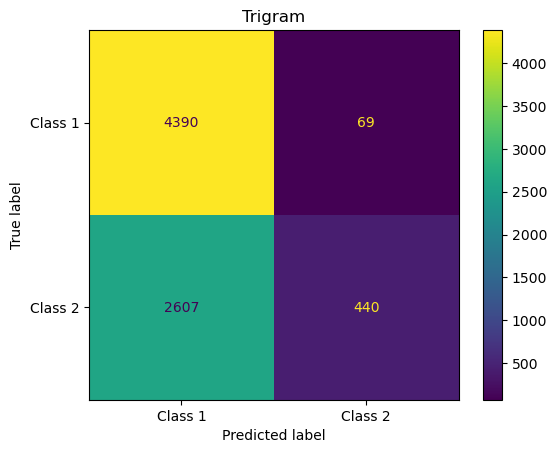

              precision    recall  f1-score   support

     Class 1       0.63      0.98      0.77      4459
     Class 2       0.86      0.14      0.25      3047

    accuracy                           0.64      7506
   macro avg       0.75      0.56      0.51      7506
weighted avg       0.72      0.64      0.56      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.25.
2023-01-06 20:42:28,382 | INFO : Calculating for Stemming...
2023-01-06 20:42:28,382 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
train time: 0.46575403213500977
2023-01-06 20:42:28,873 | INFO : Results for Stemming.


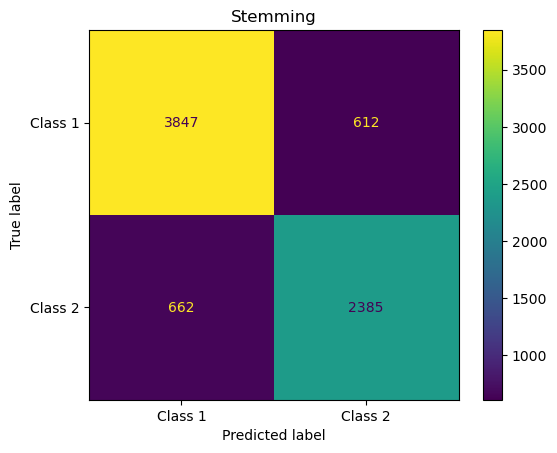

              precision    recall  f1-score   support

     Class 1       0.85      0.86      0.86      4459
     Class 2       0.80      0.78      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.
2023-01-06 20:42:29,047 | INFO : Calculating for Lemmatization...
2023-01-06 20:42:29,048 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
train time: 0.40990352630615234
2023-01-06 20:42:29,483 | INFO : Results for Lemmatization.


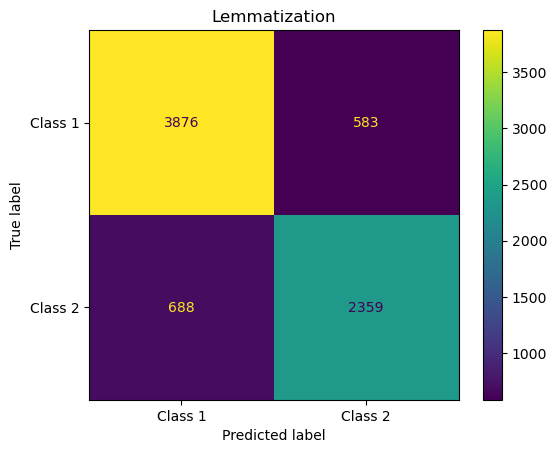

              precision    recall  f1-score   support

     Class 1       0.85      0.87      0.86      4459
     Class 2       0.80      0.77      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [8]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = LogisticRegression(max_iter = 1000, random_state=42)
    classifier.fit(X_train, y_train)
    training_time = time.time() - t
    print(f"train time: {training_time}" )
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)
    

The results for the bigram were poor, and the trigram even worse. It would seem that the best predictor for the business class were individual words rather than combination of words.<br>
The impact of stemming was no overall improvement for the F1 scores, whilst for lemmanization there was a slight improvement.

Since the best result came from the last example, let use GridSearchCV to find the best hyperparameter C for Logistic Regression<br>
    C : float, default=1.0<br>
        Inverse of regularization strength; must be a positive float.<br>
        Like in support vector machines, smaller values specify stronger regularization.

In [10]:
params = {"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000,random_state=42), params)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LogisticRegression(C=1, max_iter=1000, random_state=42)

So the best value for C is 1, which is the default value